# ws 04

In [41]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set_style('darkgrid')
np.random.seed(seed=1) 

x = np.random.uniform(0, 1, 12) 

def f(x): 
    return 2 * x + 0 #+ 0  

noise = 0.15 
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise  

In [42]:
x.shape , y.shape

((12,), (12,))

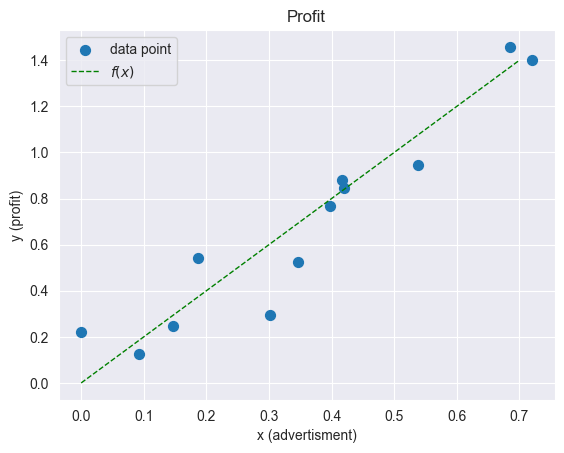

In [43]:
plt.scatter(x, y, marker='o', s=50, label='data point')

plt.plot([0, .7], [f(0),1.4], 'g--', lw=1, label='$f(x)$')
plt.xlabel('x (advertisment)')
plt.ylabel('y (profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

In [44]:
def neuron(x, w):
    return w*x + 0

def loss_mse(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)

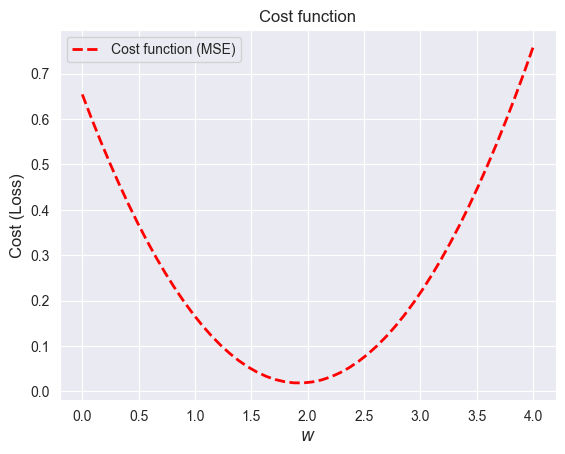

In [45]:
ws = np.linspace(0, 4, num=50) 

loss_ws = [loss_mse(neuron(x,w), y) for w in ws]

plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function')
plt.legend()
plt.show()

In [46]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = x.reshape(-1, 1)

lm.fit(X, y)

print(lm.coef_, lm.intercept_)  # w and b

[1.87331728] 0.02454657084406997


In [47]:
def gradient(w, x, y_true):
    y_pred = neuron(x, w)
    return 2 * x * (y_pred - y_true) # use this


def delta_w(w_k, x, y, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, y))

# w = np.random.rand()
w = 0.08 
learning_rate = .9 

#no_of_iterations = 3
no_of_iterations = 22 

history_loss = [(w, loss_mse(neuron(x, w), y))] 
for i in range(no_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    history_loss.append((w, loss_mse(neuron(x, w), y)))  


for i in range(0, len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))


0 -> w: 0.08 	 loss: 0.6026350889130302 
1 -> w: 0.65 	 loss: 0.2972873040173511 
2 -> w: 1.04 	 loss: 0.15157473984131506 
3 -> w: 1.32 	 loss: 0.08204041731132092 
4 -> w: 1.50 	 loss: 0.04885850168828629 
5 -> w: 1.63 	 loss: 0.0330240262184311 
6 -> w: 1.72 	 loss: 0.025467783346443618 
7 -> w: 1.79 	 loss: 0.02186192936983673 
8 -> w: 1.83 	 loss: 0.02014120875234395 
9 -> w: 1.86 	 loss: 0.019320077485611143 
10 -> w: 1.88 	 loss: 0.01892823202833484 
11 -> w: 1.89 	 loss: 0.018741242604586542 
12 -> w: 1.90 	 loss: 0.018652010883395336 
13 -> w: 1.91 	 loss: 0.018609429330347378 
14 -> w: 1.91 	 loss: 0.01858910932939065 
15 -> w: 1.92 	 loss: 0.018579412584924414 
16 -> w: 1.92 	 loss: 0.018574785279372428 
17 -> w: 1.92 	 loss: 0.018572577120051947 
18 -> w: 1.92 	 loss: 0.018571523382076387 
19 -> w: 1.92 	 loss: 0.018571020536239657 
20 -> w: 1.92 	 loss: 0.01857078057721628 
21 -> w: 1.92 	 loss: 0.01857066606829785 
22 -> w: 1.92 	 loss: 0.01857061142441651 


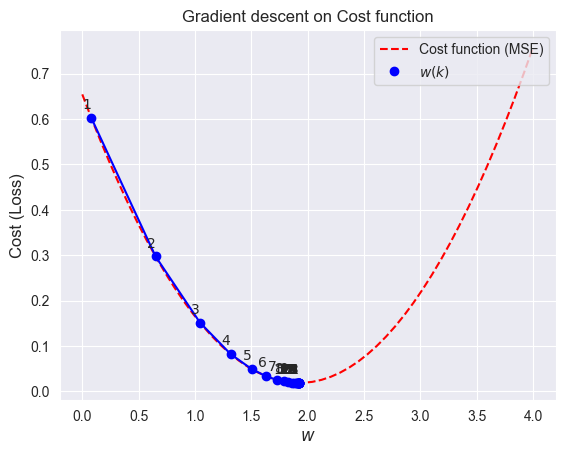

In [48]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'${i+1}$', ha='right' )
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

WS 05

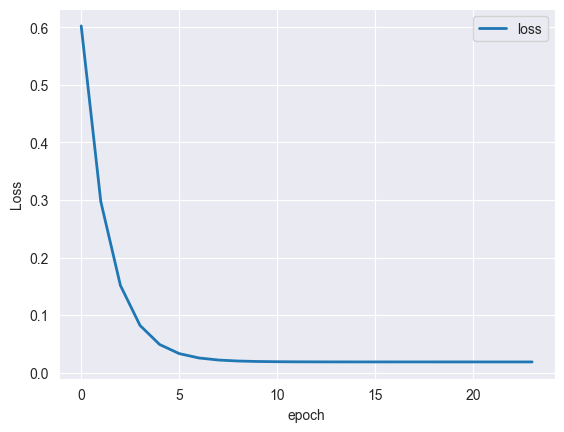

In [49]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

WS 08 see "02 ws 03"